### Ling Thang 
##### HW2 Binary Classification
##### CS3210 - Machine Learning 
##### Feng Jiang 

## Sources
- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data
- https://www.kaggle.com/code/jboscher/starter-pima-indians-diabetes-database-3d235725-1

In [60]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Using pandas to read from the csv file

In [61]:
# set the names of the columns
col_names = ['Pregnant', 'Glucose', 'BP', 'SkinThickness', 'insulin', 'BMI', 'Pedigree', 'Age', 'Outcome']

# load dataset
pima = pd.read_csv("pima-indians-diabetes-database.csv", header = None, names = col_names)

n_rows, n_cols = pima.shape
print(f'The dataset has {n_rows} rows and {n_cols} columns\n')

# print the first 5 rows of the dataset to make sure it was loaded correctly
print(pima.head())

The dataset has 768 rows and 9 columns

   Pregnant  Glucose  BP  SkinThickness  insulin   BMI  Pedigree  Age  Outcome
0         6      148  72             35        0  33.6     0.627   50        1
1         1       85  66             29        0  26.6     0.351   31        0
2         8      183  64              0        0  23.3     0.672   32        1
3         1       89  66             23       94  28.1     0.167   21        0
4         0      137  40             35      168  43.1     2.288   33        1



# Select data from the csv file to use for the model

## Reasons why these features were selected:
- Pregnant
- Glucose
- BP (Blood Pressure)
- BMI 
- Age 

`Glucose`, `BP`, `BMI` and `Age` are easy traits that is often a good indicator of diabetes.

`Pregnancy` although not a direct indicator of diabetes, it is a good indicator of the risk of diabetes and also I wanted to see what would happen. 

In [62]:
# spotlight is a subset of the dataset that contains only the columns we are interested in
spotlight = pima[['Pregnant', 'Glucose', 'BP', 'BMI', 'Age', 'Outcome']]

print(spotlight.head())

   Pregnant  Glucose  BP   BMI  Age  Outcome
0         6      148  72  33.6   50        1
1         1       85  66  26.6   31        0
2         8      183  64  23.3   32        1
3         1       89  66  28.1   21        0
4         0      137  40  43.1   33        1


# Replace the bad data 

## Bad data:
- 0 in Glucose, BP, BMI, and Age

`Glucose`, `BP`, `BMI`, and `Age` values cannot be 0 
Hence, we replace the 0 values with the mean of the respective column. 

In [63]:
X = spotlight[['Pregnant', 'Glucose', 'BP', 'BMI', 'Age']]
y = spotlight['Outcome']

# Replace bad data with median value
# this will replace all 0 values with the median value of the column they are in
# excluding pregnant column
# Replace bad data with median value, excluding 'Pregnant' column
X.replace(0, np.nan, inplace=True)
X.fillna(X.median(), inplace=True)


/var/folders/22/hdrqs83s5z94vp_xg1v9l_180000gn/T/ipykernel_37404/2134239773.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(0, np.nan, inplace=True)
/var/folders/22/hdrqs83s5z94vp_xg1v9l_180000gn/T/ipykernel_37404/2134239773.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


# Feature Scaling

scale all columns to ensure that the learning reate produces a similar size step in each dimension

#### The following cell also contains step 6 and 7

- Use “train _test_split” from sklearn.model_selection to split test and training data by 40%
testing + 60% training. (1pt)

- fit your model wiht the trainign data and test model after fitting

In [64]:
# Feature scaling
mins = X.min() 
maxes = X.max()
X = (X - mins) / (maxes - mins)

# Split the dataset into the training set and test set 
# 40% Testing : 60% Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

# Fit the Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Test Model rounded to the nearest integer
y_pred = model.predict(X_test)

# print contents of y to make sure output is binary
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))


Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]


# Calculate and Print
- Confusion Matrix
- precision, recall, and F1 score

In [65]:
# Declaring the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Confusion Matrix: {confusion_matrix}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')
print(f'F1 Score: {f1}')


Confusion Matrix: [[189  16]
 [ 53  50]]
Precision Score: 0.7575757575757576
Recall Score: 0.4854368932038835
F1 Score: 0.591715976331361


# Plot out the ROC curve and print out the ROC_AUC score

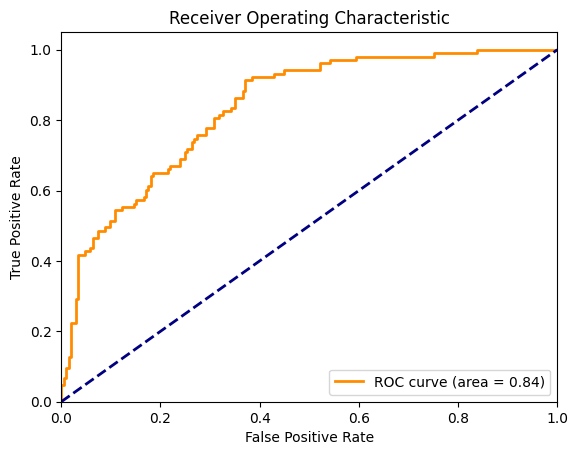

ROC AUC Score: 0.8353303338858631


In [66]:
# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("ROC AUC Score:", roc_auc)


# ROC AUC Score of 0.835

## Conclusion:
- Based on the ROC AUC score, we can conclude that the model has a `83.5%` chance of distinguishing between positive and negative classes.

#### Although the mdoel is not perfect it is a good start to learning about logistic regression
